# BASE MODELS

## 1. Definition

### 1.1 Base Model 

With this model we see the percentage of people who pay, and the percentage of people do not pay. Basically this is the accuracy we have to beat performing our models.

### 1.2 Logistic Model

Logistic model uses a logistic function to predict a categorical dependent variable. This variable must be binary

## 2. Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.metrics import classification_report

import scikitplot as skplt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 

import pickle 

## 3. Load Data

In [2]:
loan = pd.read_csv('../data/BB.DD_MODELOS.csv')
loan.shape

(460541, 50)

In [8]:
loan.head()

,Unnamed: 0,loan_acceptance,"('acc_now_delinq',)","('acc_open_past_24mths',)","('all_util',)","('annual_inc',)","('avg_cur_bal',)","('bc_util',)","('collections_12_mths_ex_med',)","('delinq_2yrs',)",...,"('tax_liens',)","('tot_cur_bal',)","('total_acc',)","('total_bal_ex_mort',)","('total_bc_limit',)","('total_cu_tl',)","('total_rev_hi_lim',)","('MORTGAGE',)","('OWN',)","('RENT',)"
0,0,1,-0.070414,1.010683,-4.391856,1.169092,0.632931,-1.756350,-0.121123,-0.373769,...,-0.136687,1.966093,1.645054,1.082435,0.364780,3.872116,0.169542,-0.990665,2.932031,-0.817319
1,1,1,-0.070414,-0.889720,2.588767,-0.388652,-0.712121,1.344204,-0.121123,-0.373769,...,-0.136687,-0.865215,-1.644651,-0.937178,-0.813060,-1.373566,-0.787800,-0.990665,-0.341061,1.223512
2,2,1,-0.070414,2.594353,-3.840754,0.518772,0.083906,-1.236562,-0.121123,-0.373769,...,-0.136687,0.889188,0.082444,-0.081508,3.037755,3.872116,1.523901,1.009422,-0.341061,-0.817319
3,3,1,-0.070414,0.693949,-4.391856,-0.358722,-0.783204,-1.443750,-0.121123,-0.373769,...,-0.136687,-0.830447,-0.411012,-0.823391,-0.082319,-1.373566,-0.081056,-0.990665,-0.341061,1.223512
4,4,1,-0.070414,0.060482,3.690971,-0.010558,1.173048,1.020700,-0.121123,0.716465,...,-0.136687,-0.074671,-1.315681,-0.468803,-0.841905,-1.373566,-0.804695,1.009422,-0.341061,-0.817319


In [3]:
data = loan.iloc[:,1:]
data.shape

(460541, 49)

In [10]:
data.head()

,loan_acceptance,"('acc_now_delinq',)","('acc_open_past_24mths',)","('all_util',)","('annual_inc',)","('avg_cur_bal',)","('bc_util',)","('collections_12_mths_ex_med',)","('delinq_2yrs',)","('delinq_amnt',)",...,"('tax_liens',)","('tot_cur_bal',)","('total_acc',)","('total_bal_ex_mort',)","('total_bc_limit',)","('total_cu_tl',)","('total_rev_hi_lim',)","('MORTGAGE',)","('OWN',)","('RENT',)"
0,1,-0.070414,1.010683,-4.391856,1.169092,0.632931,-1.756350,-0.121123,-0.373769,-0.018151,...,-0.136687,1.966093,1.645054,1.082435,0.364780,3.872116,0.169542,-0.990665,2.932031,-0.817319
1,1,-0.070414,-0.889720,2.588767,-0.388652,-0.712121,1.344204,-0.121123,-0.373769,-0.018151,...,-0.136687,-0.865215,-1.644651,-0.937178,-0.813060,-1.373566,-0.787800,-0.990665,-0.341061,1.223512
2,1,-0.070414,2.594353,-3.840754,0.518772,0.083906,-1.236562,-0.121123,-0.373769,-0.018151,...,-0.136687,0.889188,0.082444,-0.081508,3.037755,3.872116,1.523901,1.009422,-0.341061,-0.817319
3,1,-0.070414,0.693949,-4.391856,-0.358722,-0.783204,-1.443750,-0.121123,-0.373769,-0.018151,...,-0.136687,-0.830447,-0.411012,-0.823391,-0.082319,-1.373566,-0.081056,-0.990665,-0.341061,1.223512
4,1,-0.070414,0.060482,3.690971,-0.010558,1.173048,1.020700,-0.121123,0.716465,-0.018151,...,-0.136687,-0.074671,-1.315681,-0.468803,-0.841905,-1.373566,-0.804695,1.009422,-0.341061,-0.817319


In [4]:
X = data.drop(['loan_acceptance'], axis = 1).values
Y = data['loan_acceptance'].values

In [5]:
# We use the train_test_split function from SkLearn to split our dataset in two groups, the big one is to train the
# model and the 10% (in this case) to predict.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1) # Percentage of the test group.

## 4. Base Model 

In [62]:
# Perform our model
basemodel = DummyClassifier(strategy = 'most_frequent', random_state = 12345)

# Train the model
basemodel.fit(X_train, Y_train)

DummyClassifier(random_state=12345, strategy='most_frequent')

In [63]:
# Predict
predbase = basemodel.predict(X_test)
print(predbase)

[1 1 1 ... 1 1 1]


In [64]:
# Check its accuracy
accuracy_score(Y_test, predbase)

0.7478232548040387

### Matriz de confusión

In [51]:
confusion_matrix = confusion_matrix(Y_test, predbase)
confusion_matrix = pd.DataFrame(confusion_matrix)

In [52]:
def conf_matrix(Y_test, predbase):
    conf_plot = sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
    bottom, top = conf_plot.get_ylim()
    conf_plot.set_ylim(bottom + 0.5, top - 0.5)
    conf_plot.set_title("Confusion matrix")

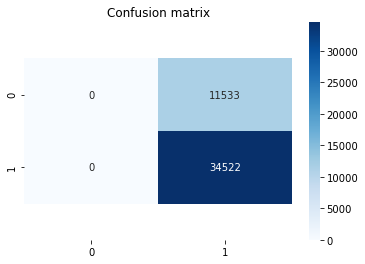

In [39]:
conf_matrix(Y_test, predbase)

### Confusion Matrix Normalized

In [80]:
confusion_matrix_normalize = confusion_matrix(Y_test, predbase, normalize = 'pred')
confusion_matrix_normalize = pd.DataFrame(confusion_matrix_normalize)

In [83]:
def conf_matrix(Y_test, predbase):
    conf_plot = sns.heatmap(confusion_matrix_normalize, annot=True, cmap='Blues', fmt='g')
    bottom, top = conf_plot.get_ylim()
    conf_plot.set_ylim(bottom + 0.5, top - 0.5)
    conf_plot.set_title("Confusion matrix")

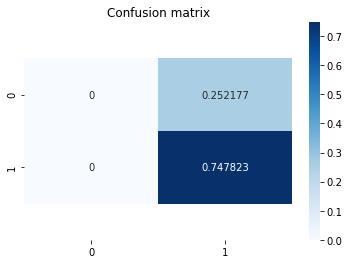

In [84]:
conf_matrix(Y_test, predbase)

In [87]:
print(classification_report(Y_test, predbase))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     11614
           1       0.75      1.00      0.86     34441

    accuracy                           0.75     46055
   macro avg       0.37      0.50      0.43     46055
weighted avg       0.56      0.75      0.64     46055



## 5. Logistic Regression Model

### 5.1 Simple Logistic Model

In [6]:
# Create the model with the function LogisticRegression from SkLearn
logreg = LogisticRegression(random_state=40,
                                solver="saga", 
                                penalty="l1",
                                class_weight="balanced",
                                C=1.0,
                                max_iter=500)
# Training the model
logreg.fit(X_train, Y_train)

LogisticRegression()

In [7]:
# Predict with the model
pred = logreg.predict(X_test)

# We just want to print the result to check if the output is correct (0 means deny, 1 accept).
print(pred)

[1 1 1 ... 1 1 1]


In [8]:
# Check its accuracy
accuracy_score(Y_test, pred)

0.7529258495277386

As we can see the logistic model is a bit better than the Base Model. This is a very simple Logistic Model, without using more parameters or functions. 
A good point for the Logistic Model is that it is very easy to use it. Actually, we should perform more complex Logistic Models.

### Confusion Matrix

In [92]:
confusion_matrix = confusion_matrix(Y_test, pred)
confusion_matrix = pd.DataFrame(confusion_matrix)

In [93]:
def conf_matrix(Y_test, pred):
    conf_plot = sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
    bottom, top = conf_plot.get_ylim()
    conf_plot.set_ylim(bottom + 0.5, top - 0.5)
    conf_plot.set_title("Confusion matrix")

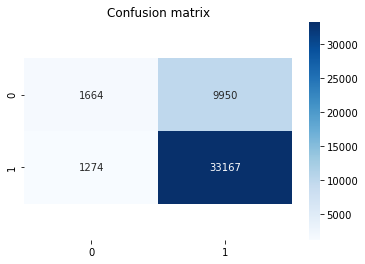

In [94]:
conf_matrix(Y_test, pred)

With the confusion matrix we can see that our logistic model is predicting very well the people who pay, but, however, is not a good model to predict people who do not pay.

The up-left box (True positive) should be higher. At least should be higher than the up-right box (False Positive). The up-left box of the confusion matrix represent the prediction of the people who do not pay ( Remember: 0 unpaid, 1 paid. Detect this people is the target of our model.

The down-right box, detection of people who pay has a good value.

### ROC Curve

In [9]:
predicted_probas = logreg.predict_proba(X_test)

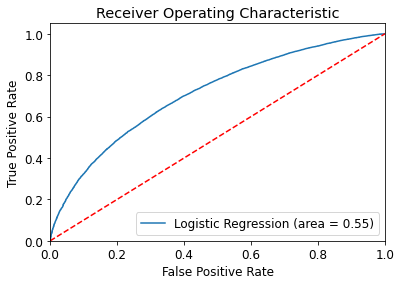

In [139]:
logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Cumulative Gain Curve

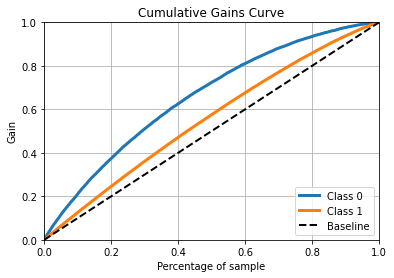

In [129]:
skplt.metrics.plot_cumulative_gain(Y_test, predicted_probas)
plt.show()

###  Lift Curve

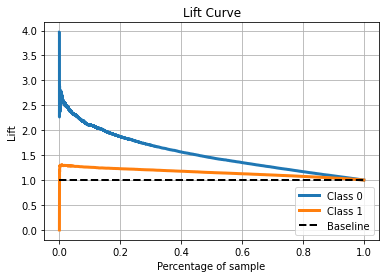

In [130]:
skplt.metrics.plot_lift_curve(Y_test, predicted_probas)
plt.show()

### Histogram 

Text(0, 0.5, 'Frequency')

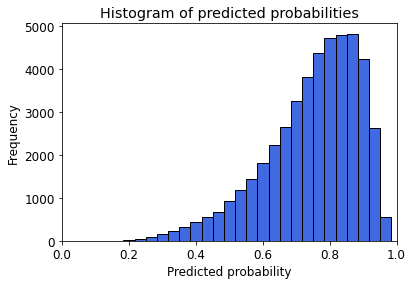

In [138]:
y_pred_prob = predicted_probas[:, 1]

plt.rcParams['font.size'] = 12
plt.hist(y_pred_prob, bins=25,facecolor='royalblue', edgecolor = 'black')
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')

In [23]:
print(logreg.coef_)

[[-0.08611757 -0.16856892 -0.05288085  0.13922778  0.02706292  0.03513198
  -0.03305859 -0.11845957 -0.02219856 -0.1939348   0.05881316  0.03828943
   0.02195168 -0.00109163  0.01703685 -0.46200896 -0.24768927  0.00080945
  -0.03283793  0.00913425  0.11386492  0.00506367  0.04856403 -0.03634639
  -0.11991743 -0.00315449 -0.02240807  0.13754518 -0.03050273  0.23385277
  -0.03362077 -0.0697704   0.01699786 -0.01109312  0.02678979 -0.0466786
  -0.08735674 -0.05074068 -0.03560003  0.07435906 -0.12184006 -0.01412542
   0.11392153  0.05872051  0.10509894  0.04694815 -0.00107174 -0.05052885]]


In [27]:
print(np.std(X, 0)*logreg.coef_)

[[-3.58536427e-18 -1.62092176e-01 -3.89092030e-02  8.72399583e-02
   2.38646658e-02  3.50428942e-02 -2.79392009e-02 -9.74961112e-02
  -2.31050149e-19 -1.92926412e-01  5.88131638e-02  2.46180804e-02
   1.45978626e-02 -7.01817938e-04  1.65275656e-02 -4.55475204e-01
  -2.47244461e-01  4.45992375e-04 -3.18423017e-02  8.43558049e-03
   1.08559654e-01  5.02835072e-03  4.84663853e-02 -3.50758756e-02
  -1.15280892e-01 -2.97474787e-03 -2.16048229e-02  1.29931145e-01
  -2.92370671e-02  2.25720611e-01 -4.66436329e-19 -4.84129387e-19
   1.05801008e-02 -1.05418198e-02  2.57802959e-02 -2.23764452e-02
  -8.73567435e-02 -3.41301802e-02 -2.19739442e-02  6.78144784e-02
  -1.18781705e-01 -1.24480618e-02  1.05266866e-01  3.02250505e-02
   7.75301386e-02  4.69481481e-02 -1.07174097e-03 -5.05288523e-02]]


In [30]:
from yellowbrick.model_selection import FeatureImportances

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
detected multi-dimensional feature importances but stack=False, using mean to aggregate them.


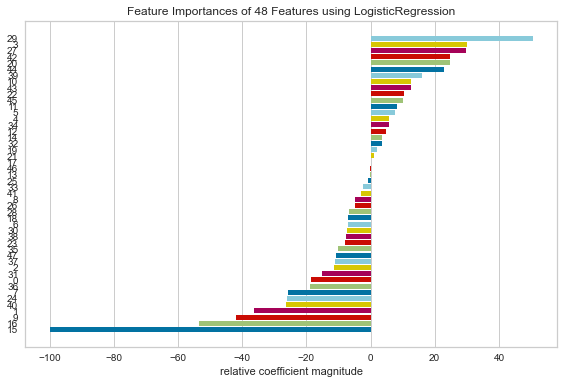

<AxesSubplot:title={'center':'Feature Importances of 48 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>

In [31]:
viz = FeatureImportances(logreg)
viz.fit(X,Y)
viz.show()

In [44]:
X_test.mean()

-0.013331721577007941

### Model Statistics

In [19]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.55      0.14      0.23     11652
           1       0.77      0.96      0.85     34403

    accuracy                           0.75     46055
   macro avg       0.66      0.55      0.54     46055
weighted avg       0.71      0.75      0.69     46055



Checking this statistic we can see that our model is good for the '1' (paid), but quite bad to detect 0 (unpaid).

### Save the model

Due to some problems with our laptop´s memory we could not save this model.

In [22]:
model = logreg
filename = 'logistic_model.sav'
pickle.dump(model, open(filename, 'wb'))

## 5.2 Alternative Logistic Model

In this case we just create a better logictic model. Due to the problems with our laptops to run all models we just want to present this better logistic model. However, we do not run it.

In [ ]:
os = SMOTE(random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

logreg = LogisticRegression()
rfe = RFE(logreg, 20)

os_data_X,os_data_y=os.fit_sample(X_train, Y_train)

rfe = rfe.fit(os_data_X, os_data_y.values.ravel())

/Users/gonzalocarretero/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
